In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchdiffeq

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
T = 1.0  # Конечное время для ODE
SOLVER = 'dopri5'  # Решатель ODE (метод Дорманда-Принса 4/5)

Using device: cpu


In [31]:
from torchvision import datasets, transforms
import torchdiffeq
from torch.utils.data import DataLoader
from prepare_mnist import get_mnist_loaders

In [32]:
train_loader, test_loader = get_mnist_loaders(BATCH_SIZE)
print(f"Train samples: {len(train_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")

Train samples: 60000
Test samples: 10000


In [33]:
import time

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchdiffeq



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
T = 1.0  # Конечное время для ODE
SOLVER = 'dopri5'  # Решатель ODE (метод Дорманда-Принса 4/5)

Using device: cpu


In [35]:
from tqdm import tqdm
import torch

In [37]:
from train_test import train_full_model
start_time = time.time()
model, history = train_full_model(SOLVER, LEARNING_RATE, EPOCHS, T, device, train_loader, test_loader)
training_time = time.time() - start_time

Starting training for 10 epochs
Model parameters: 268,298

Epoch 1/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:08<00:00, 18.66it/s, Loss=0.0026, Acc=98.07%]



Epoch 1 Summary:
Train Loss: 0.2352, Train Acc: 92.53%, NFE: 25.9
Test Loss:  0.0669, Test Acc:  98.07%, NFE: 26.0
Learning Rate: 0.001000

Epoch 2/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:07<00:00, 21.63it/s, Loss=0.0104, Acc=98.19%]



Epoch 2 Summary:
Train Loss: 0.0642, Train Acc: 98.11%, NFE: 22.5
Test Loss:  0.0596, Test Acc:  98.19%, NFE: 20.0
Learning Rate: 0.001000

Epoch 3/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:07<00:00, 20.26it/s, Loss=0.0012, Acc=98.91%]



Epoch 3 Summary:
Train Loss: 0.0418, Train Acc: 98.79%, NFE: 20.0
Test Loss:  0.0363, Test Acc:  98.91%, NFE: 20.0
Learning Rate: 0.001000

Epoch 4/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.89it/s, Loss=0.0004, Acc=99.15%]



Epoch 4 Summary:
Train Loss: 0.0330, Train Acc: 99.05%, NFE: 20.0
Test Loss:  0.0295, Test Acc:  99.15%, NFE: 20.0
Learning Rate: 0.001000

Epoch 5/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:07<00:00, 21.34it/s, Loss=0.0006, Acc=98.88%]



Epoch 5 Summary:
Train Loss: 0.0266, Train Acc: 99.20%, NFE: 20.0
Test Loss:  0.0399, Test Acc:  98.88%, NFE: 20.0
Learning Rate: 0.000500

Epoch 6/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:07<00:00, 20.71it/s, Loss=0.0001, Acc=99.16%]



Epoch 6 Summary:
Train Loss: 0.0135, Train Acc: 99.59%, NFE: 20.0
Test Loss:  0.0284, Test Acc:  99.16%, NFE: 20.0
Learning Rate: 0.000500

Epoch 7/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:06<00:00, 24.19it/s, Loss=0.0005, Acc=99.08%]



Epoch 7 Summary:
Train Loss: 0.0090, Train Acc: 99.73%, NFE: 20.0
Test Loss:  0.0349, Test Acc:  99.08%, NFE: 20.0
Learning Rate: 0.000500

Epoch 8/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:07<00:00, 20.97it/s, Loss=0.0001, Acc=99.06%]



Epoch 8 Summary:
Train Loss: 0.0086, Train Acc: 99.73%, NFE: 20.0
Test Loss:  0.0331, Test Acc:  99.06%, NFE: 20.0
Learning Rate: 0.000500

Epoch 9/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:07<00:00, 20.47it/s, Loss=0.0000, Acc=99.14%]



Epoch 9 Summary:
Train Loss: 0.0078, Train Acc: 99.75%, NFE: 20.0
Test Loss:  0.0315, Test Acc:  99.14%, NFE: 20.0
Learning Rate: 0.000500

Epoch 10/10
------------------------------------------------------------


Testing: 100%|██████████| 157/157 [00:06<00:00, 23.86it/s, Loss=0.0001, Acc=99.15%]


Epoch 10 Summary:
Train Loss: 0.0077, Train Acc: 99.77%, NFE: 20.0
Test Loss:  0.0346, Test Acc:  99.15%, NFE: 20.0
Learning Rate: 0.000250


In [39]:
from visualization import visualize_training_history, visualize_predictions, visualize_ode_trajectories

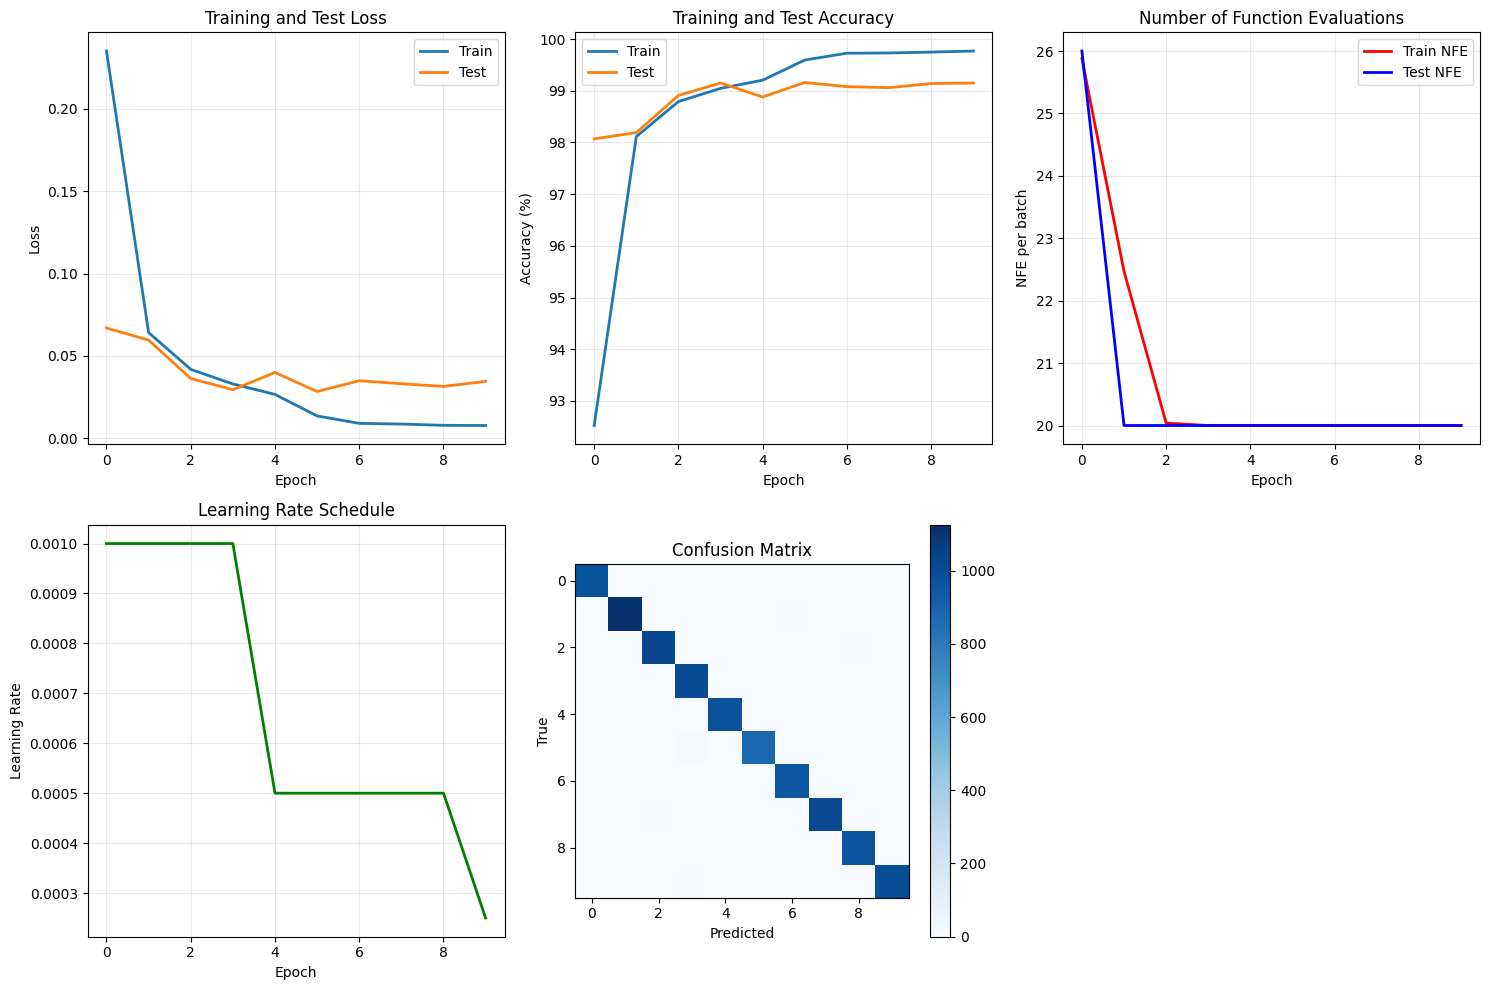

In [41]:
visualize_training_history(history, device, model, test_loader)

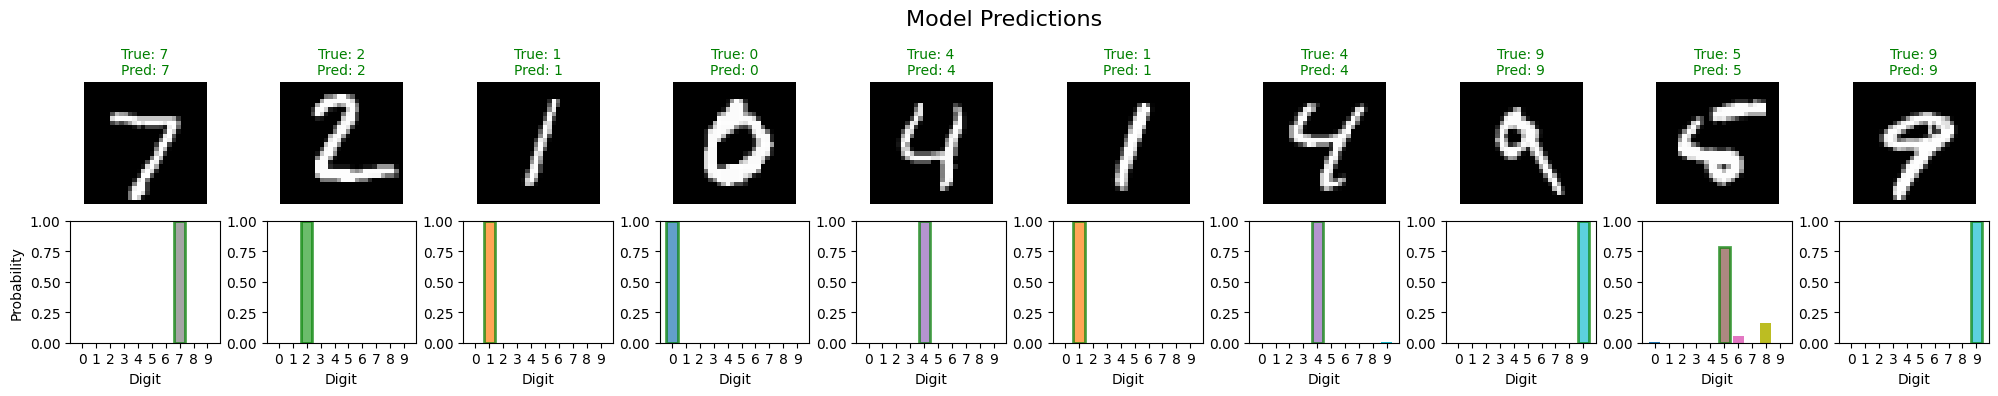

In [42]:
visualize_predictions(model, test_loader, device)

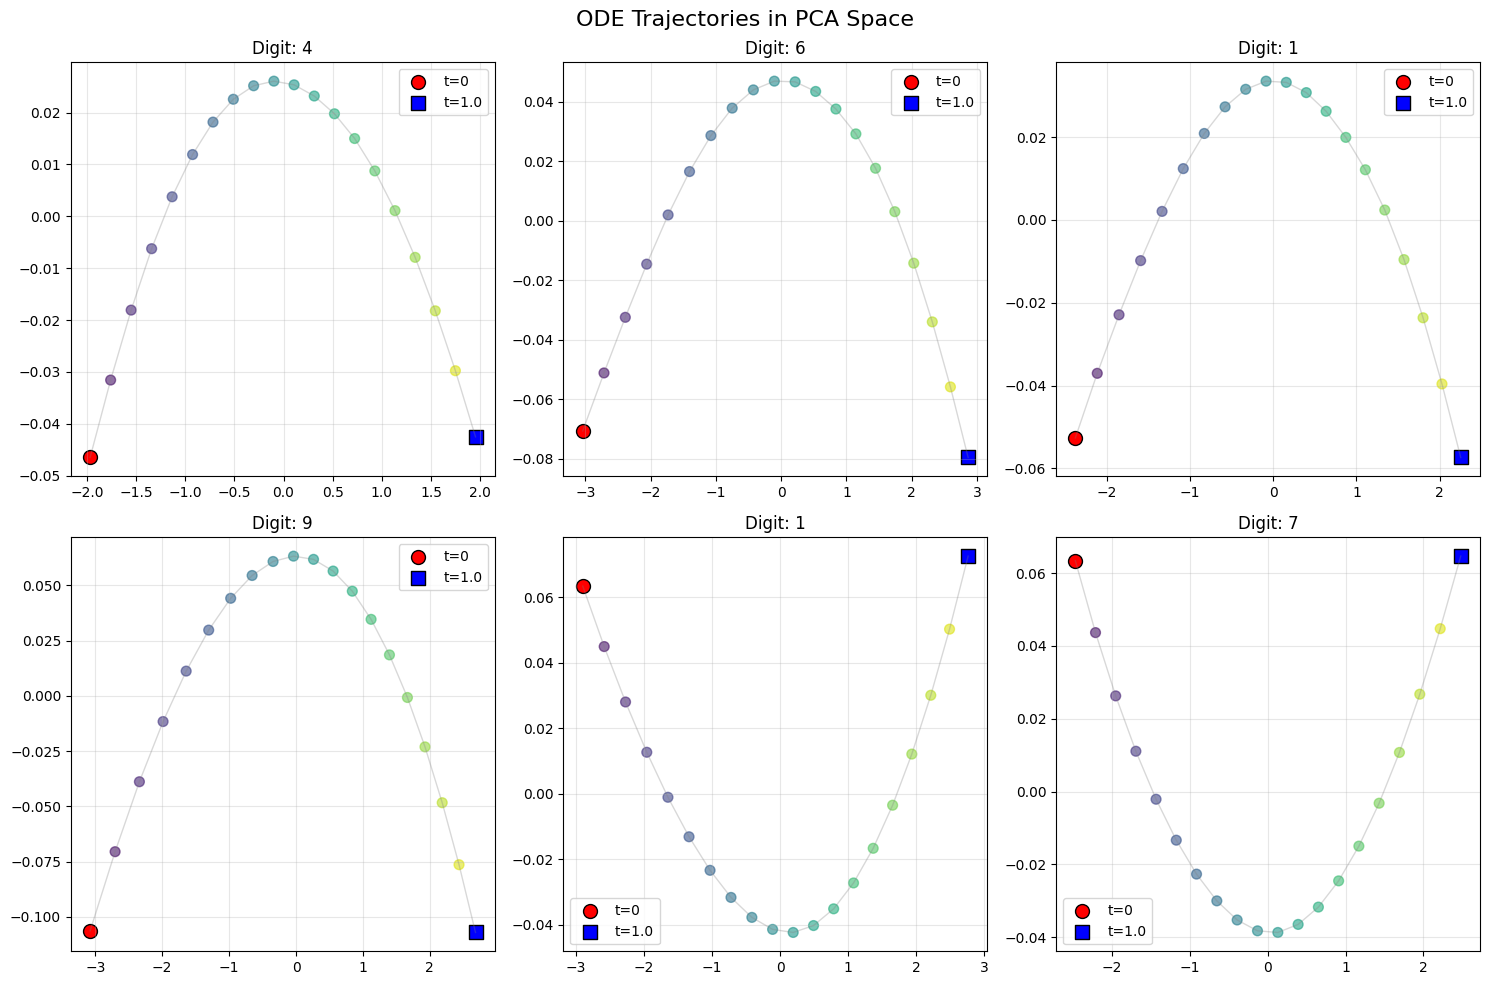

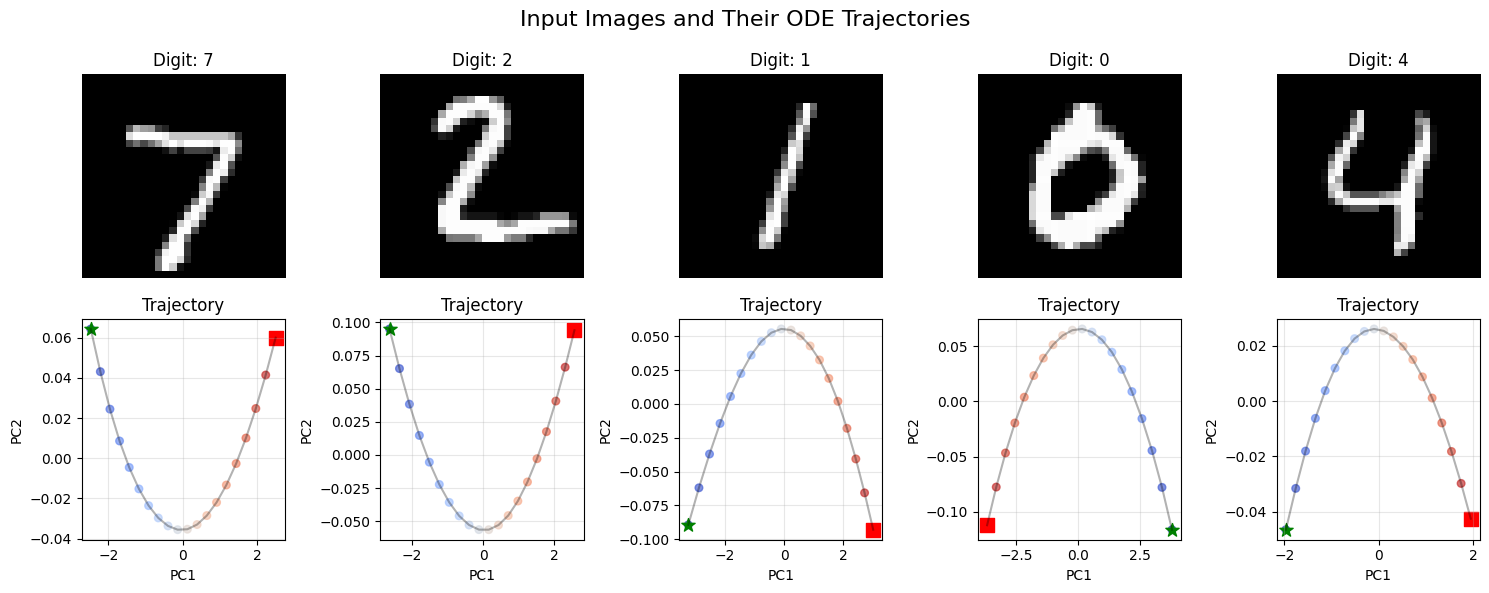

In [43]:
visualize_ode_trajectories(model, test_loader, device, n_samples=50)

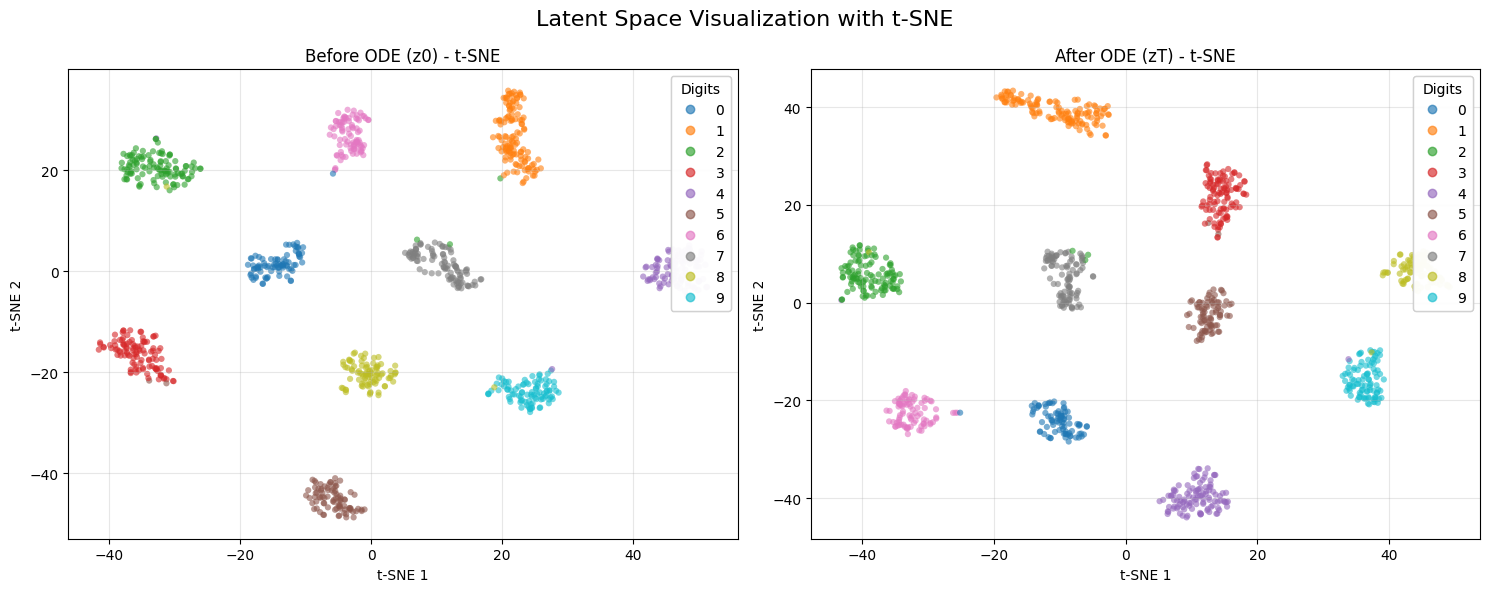

In [29]:
from visualization import  visualize_latent_spaces
visualize_latent_space(model, test_loader, device, n_samples=1000)

In [26]:
torch.save({
        'model_state_dict': model.state_dict(),
        'history': history,
        'config': {
            'ode_dim': 64,
            'T': T,
            'solver': SOLVER,
            'epochs': EPOCHS,
            'lr': LEARNING_RATE
        }
    }, 'neural_ode_mnist.pth')